In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0,1"
import sys

root_path = '/archive/MyHome/Programs/git/my_research/XAI_TP/rxicg'

image_captioner_path = os.path.join(root_path, 'captioner')
relationship_detector_path = os.path.join(root_path, 'visual_relationship')
explanation_part_path = os.path.join(root_path, 'explanation_part')

test_dataset_dir = '/archive/MyHome/Programs/git/my_research/dataset/coco_2014/test2014/'
# test_dataset_dir = os.path.join(root_path, 'test_dataset')

sys.path.insert(0, image_captioner_path)
sys.path.insert(0, relationship_detector_path)
sys.path.insert(0, explanation_part_path)

from image_captioner import Image_Captioner
from relationship_detector import Visual_Relationship_Detector
from explanation import Explainer

Using TensorFlow backend.


/archive/MyHome/Programs/git/my_research/XAI_TP/rxicg/visual_relationship/lib


In [2]:
class Demo():
    def __init__(self):
        self.test_image_name = ""
        self.test_dataset_dir = '/archive/MyHome/Programs/git/my_research/dataset/coco_2014/test2014/'
        
        self.i_captioner = Image_Captioner()
        self.r_detector = Visual_Relationship_Detector()
        self.explainer = Explainer()
        
        self.ob_save_path = ""
        self.pred_tags = []
        self.pred_caps = []
        self.va_save_path = ""
        self.sa_save_path = ""
        
        
        self.r = []
        self.r_score = []
        self.cls_boxes = []
        self.cls_names = []
        self.vr_save_path = ""
        
        self.rich_caption = ""
        self.used_relations = []
        
        
    def run_captioner(self, dataset_dir, image_name):
        self.test_image_name = image_name
        #ob_save_path, pred_tags, pred_caps, cap_scores, va_save_path, sa_save_path = self.i_captioner.get_results(dataset_dir, image_name)
        self.ob_save_path, self.pred_tags, self.pred_caps, self.va_save_path, self.sa_save_path = self.i_captioner.get_results(dataset_dir, image_name)
        
#         print('\n\nob_save_path: {}'.format(self.ob_save_path))
#         print('pred_tags: {}'.format(self.pred_tags))
#         print('pred_caps: {}'.format(self.pred_caps))
#         print('va_save_path: {}'.format(self.va_save_path))
#         print('sa_save_path: {}'.format(self.sa_save_path))
        
        
    def run_relationship_detector(self, dataset_dir, image_name):
        self.test_image_name = image_name
        # predict the relationsihps 
        # r, r_score, r_boxes, result_path = self.r_detector.generate_relationships(dataset_dir, image_name)
        self.r, self.r_score, self.cls_boxes, self.cls_names, self.vr_save_path = self.r_detector.generate_relationships_not_combining_boxes(dataset_dir, image_name)
        
    def run_explainer(self):
        self.rich_caption, self.used_relations = self.explainer.explanation(doLogging = False, test_file_name = self.test_image_name.split('.')[0])
        self.explainer.generate_final_output(self.pred_caps,
                                             self.rich_caption, 
                                             self.used_relations, 
                                             self.cls_boxes, 
                                             self.cls_names,
                                             os.path.join(test_dataset_dir, self.test_image_name))
        return self.pred_caps, self.rich_caption, self.used_relations

In [3]:
demo = Demo()

===Initializing captioning model...
Loading Faster R-CNN weights...
Loading caption weights...


/archive/MyHome/Programs/git/my_research/XAI_TP/rxicg/captioner/lib/rpn/proposal_layer.py:27: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  layer_params = yaml.load(self.param_str)


Initializing visual relationship model...
Loading the visual relationship model.
loading relationship model '/archive/MyHome/Programs/git/my_research/XAI_TP/rxicg/visual_relationship/models/VRD_RANK/epoch_9_checkpoint.pth.tar'
Finish loading the visual relationship model.


## Choose a test image among 40,000 images

In [8]:
import random

image_list = []

kepco_test = '/archive/MyHome/Programs/git/my_research/dataset/coco_2014/test2014'
kepco_test = '/archive/MyHome/Programs/git/my_research/XAI_TP/rxicg/attribute_prediction/main/test/images'

test_dataset_dir = kepco_test

for im in os.listdir(test_dataset_dir):
    image_list.append(im)
    
rand_im_name = random.choice(image_list)
print("Selected test image name: {}".format(rand_im_name))

Selected test image name: 51.jpg


In [ ]:
#i_captioner = Image_Captioner()



## Generation Part Testing

Staring caption generation...
	Saving object detection result...
----------------
Result of attribute predictor
Predicted tag 1: laptop

Predicted tag 2: monitor

Predicted tag 3: menu

Predicted tag 4: microwave

Predicted tag 5: presentation

	Saving attribute prediction result...
----------------
Result of attribute predictor
Predicted caption: 0 -12.3152275085 A white building with a street sign on the corner.
Predicted caption: 1 -12.6078863144 A white building with a street sign on the side.
Predicted caption: 2 -12.8617095947 A building with a street sign on the side of it.
Predicted caption: 3 -13.882891655 A large building with a street sign on the side of it.
Predicted caption: 4 -18.2646522522 A large building with a street sign on the side of a store.
	Saving caption generation result...
	Saving visual attention result...
attrs: ['laptop\n', 'monitor\n', 'menu\n', 'microwave\n', 'presentation\n']
cols: ['A', 'white', 'building', 'with', 'a', 'street', 'sign', 'on', 'the', '

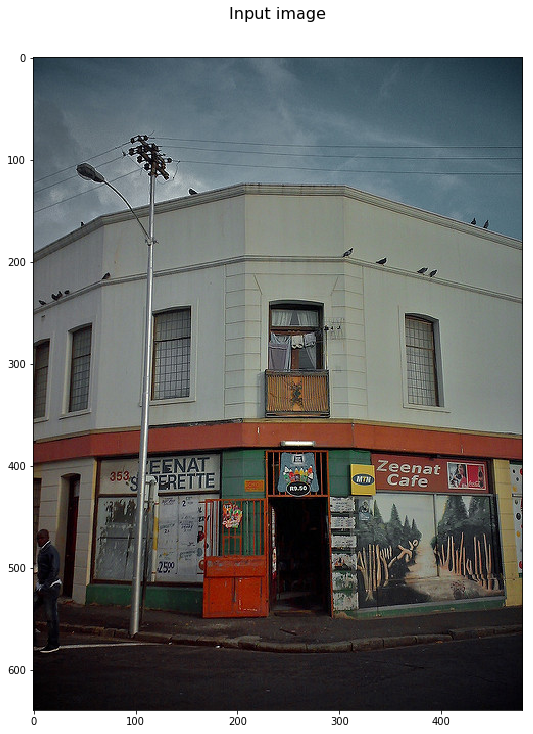

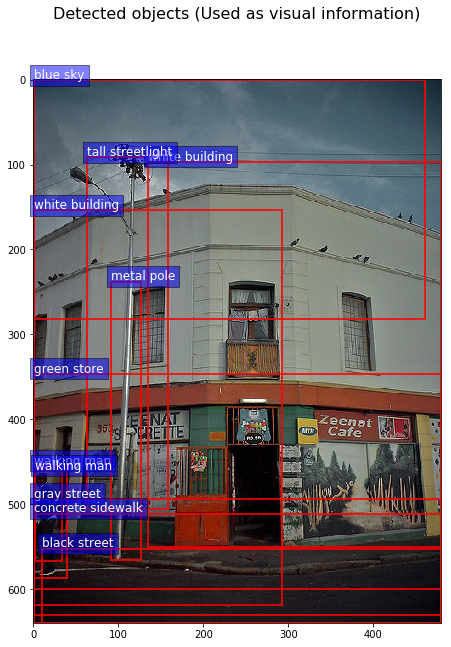

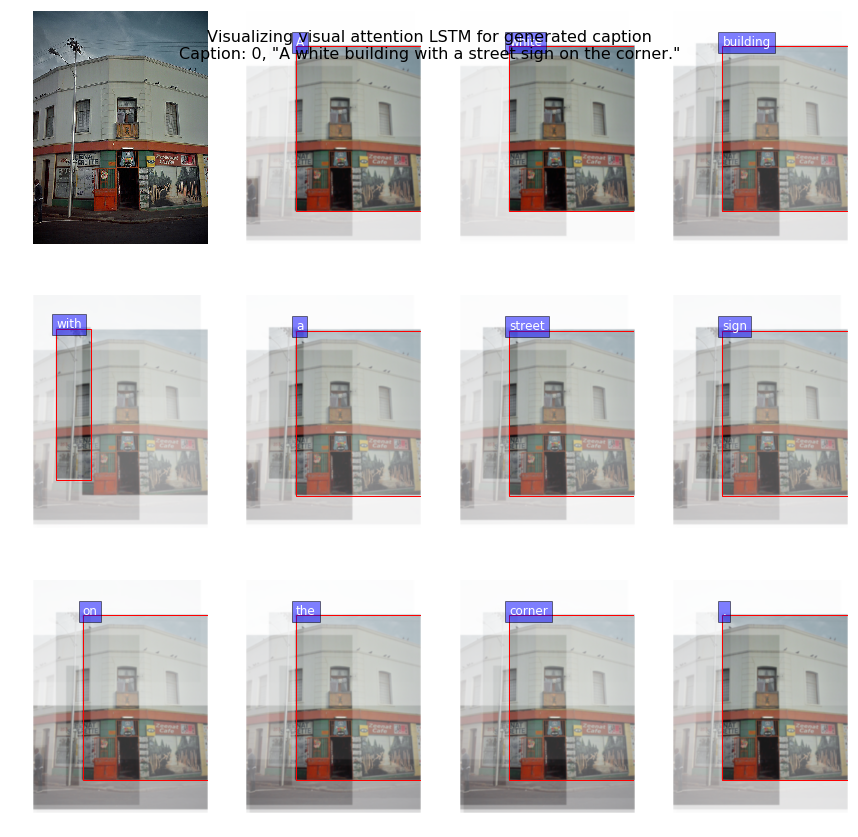

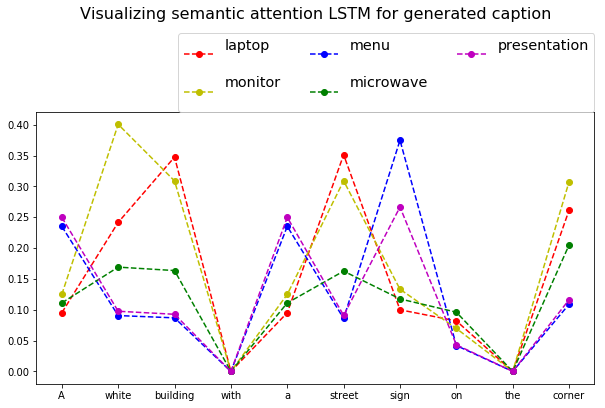

	Saving sematic attention result...


<Figure size 864x864 with 0 Axes>

In [9]:
demo.run_captioner(test_dataset_dir, rand_im_name)


#self.test_image_name = image_name
#i_captioner.get_results(test_dataset_dir, rand_im_name)
            

## Assistance Part Testing

Using config:
load model successfully!
load checkpoint /archive/MyHome/Programs/git/my_research/XAI_TP/rxicg/visual_relationship/models/faster_rcnn_1_20_7559.pth
Predicted relationship 1: sky-above-person 1.02687311172
Predicted relationship 2: sky-above-street 0.859054684639
Predicted relationship 3: sky-above-building 0.405386269093
Predicted relationship 4: person-on-street -0.0618174597621
Predicted relationship 5: building-behind-person -0.212417334318
Predicted relationship 6: street-in the front of-building -2.24526405334


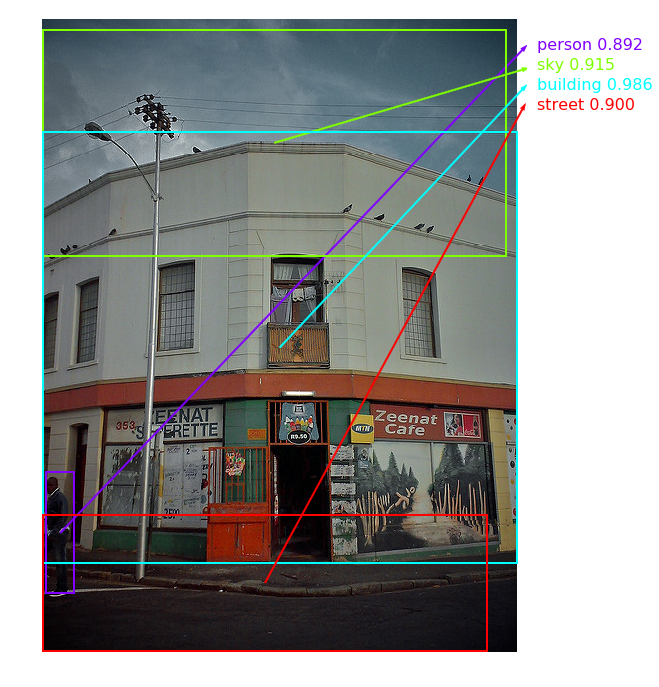

In [10]:
demo.run_relationship_detector(test_dataset_dir, rand_im_name)

## Explanation Part Testing

Origianl caption 0: A white building with a street sign on the corner.
Rich caption 0: A white building behind person with a street in the front of building and sign on the corner.
Origianl caption 1: A white building with a street sign on the side.
Rich caption 1: A white building behind person with a street in the front of building and sign on the side.
Origianl caption 2: A building with a street sign on the side of it.
Rich caption 2: A building behind person with a street in the front of building and sign on the side of it.
Origianl caption 3: A large building with a street sign on the side of it.
Rich caption 3: A large building behind person with a street in the front of building and sign on the side of it.
Origianl caption 4: A large building with a street sign on the side of a store.
Rich caption 4: A large building behind person with a street in the front of building and sign on the side of a store.


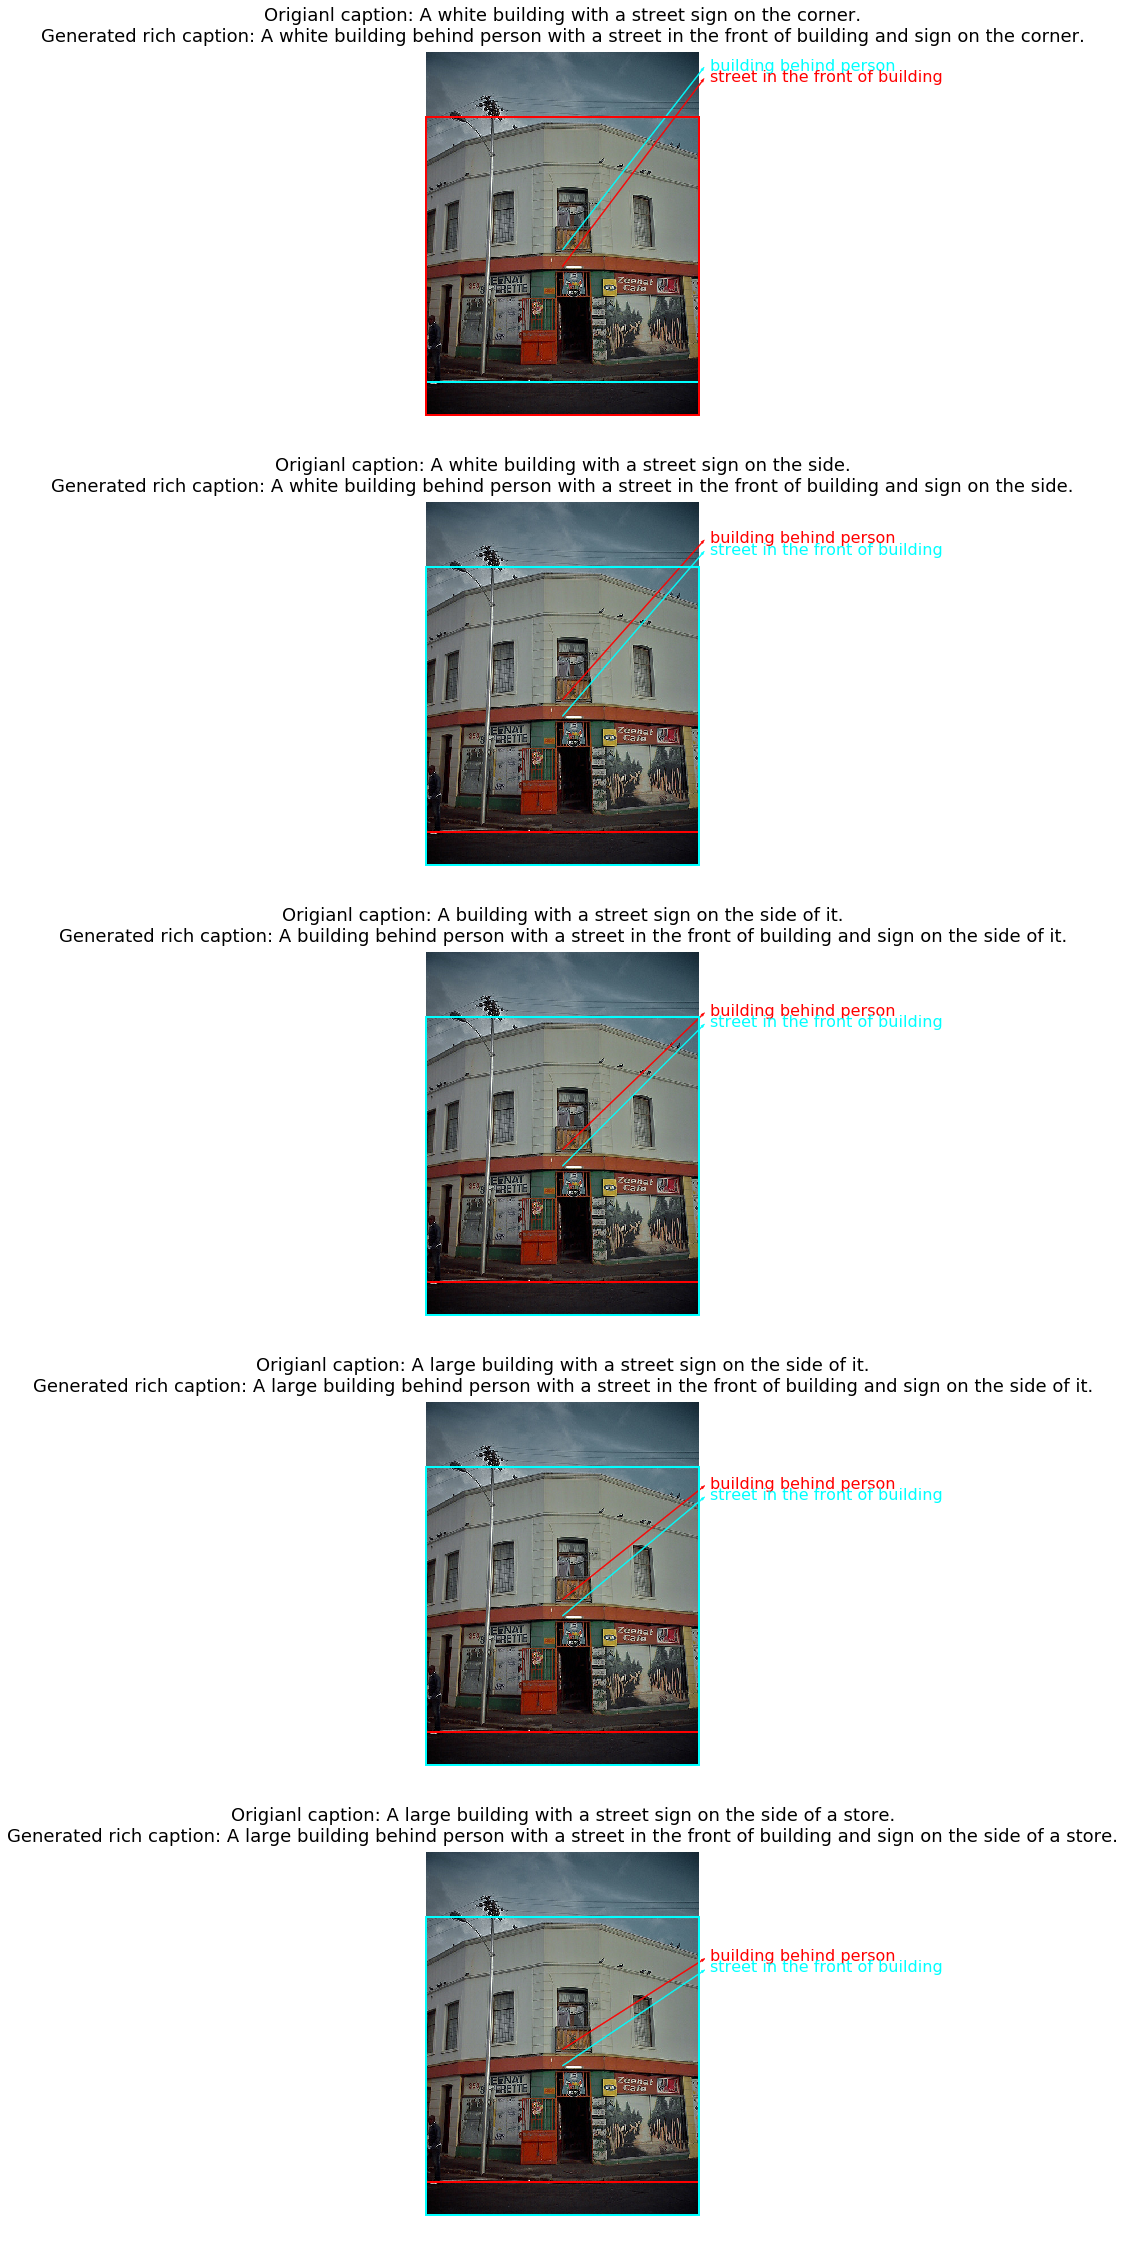

In [11]:
original_caption, rich_caption, used_relations = demo.run_explainer()

for i, o_c in enumerate(original_caption):
    print("Origianl caption {}: {}".format(i, o_c[0]))
    print("Rich caption {}: {}".format(i, rich_caption[i]))

In [ ]:
import colorsys
from __future__ import division

def _random_colors(N, bright=True):
    hsv = [(i / N, 1, 1.0) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.shuffle(colors)

    return colors

print(_random_colors(5, bright=True))